# Анализ данных. Диаграммы и графики

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.options.display.max_rows = 5000
pd.options.display.max_columns = 16

In [3]:
df = pd.read_csv('C:/Users/natal/Desktop/Bakalavr/apart_template_new_version.csv', index_col='id')

In [4]:
df.columns

Index(['city_municipality', 'city_parish', 'floor', 'floor_q', 'area',
       'comfortably', 'free_text', 'rooms_q', 'price', 'price_m2', 'type',
       'serial', 'street_title', 'house_number', 'elevator'],
      dtype='object')

##### 1.Quantitative (Количественный): floor, floor_q, area, rooms_q, price, price_m2,  
##### 2. Qualitative (Категориальный): city_municipality, city_parish, comfortably, type, serial, street_title,  house_number
##### .elevator 
##### .free_text

In [26]:
#descriptive statistics summary
df['price'].describe()

count      4053.000000
mean      75210.330252
std       84151.888817
min        1000.000000
25%       24000.000000
50%       46000.000000
75%       95000.000000
max      950000.000000
Name: price, dtype: float64

In [35]:
df.isnull().sum()

city_municipality    2
city_parish          2
floor                0
floor_q              0
area                 0
comfortably          0
free_text            1
rooms_q              0
price                0
price_m2             0
type                 0
serial               0
street_title         0
house_number         0
elevator             0
dtype: int64

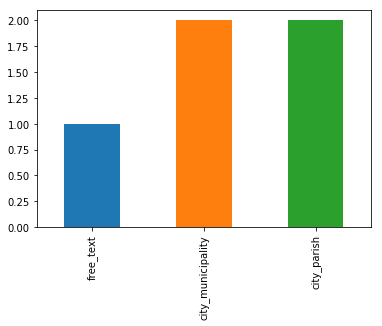

In [25]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

#### ------> 3 атрибута имеют пропущенные значения.

C:\Users\natal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


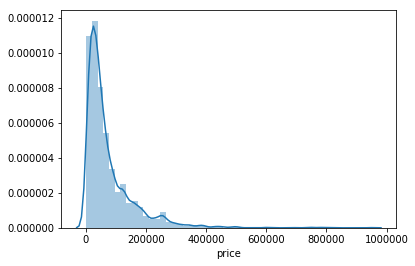

In [24]:
#histogram
sns.distplot(df['price']);

C:\Users\natal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


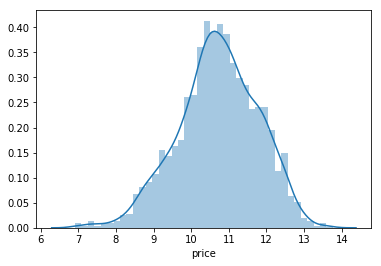

In [37]:
sns.distplot(np.log(df['price']))

#### логарифмическое нормальное распределение


In [27]:
#skewness and kurtosis/ скошеность, асимметрия и эксцесс (является показателем, отражающим остроту вершины
#и толщину хвостов одномерного рапределения)
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 2.910797
Kurtosis: 14.005496


### Критерии асимметрии и эксцесса применяют для приблизительной проверки гипотезы о нормальности эмпирического распределения. Асимметрия характеризует степень несимметричности, эксцесс - степень заостренности (сглаженности) кривой дифференциальной функции эмпирического распределения по сравнению с функцией плотности нормального распределения.
#### Коэффицие́нт асимметри́и (skewness) — числовая характеризующая степени несимметричности распределения данной случайной величины.
##### 1. Положительная величина показателя асимметрии указывает на наличие правосторонней асимметрии (более длинная ветвь вправо).
##### 2. Принято считать, что асимметрия выше 0,5 (независимо от знака) считается значительной. Если асимметрия меньше 0,25, она считается незначительной.

In [39]:
print("Skewness: %f" % np.log(df['price']).skew())
print("Kurtosis: %f" % np.log(df['price']).kurt())

Skewness: -0.274089
Kurtosis: 0.020727


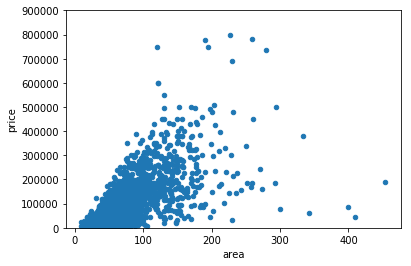

In [28]:
#scatter plot area/price
var = 'area'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,900000));

In [20]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('price')

C:\Users\natal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


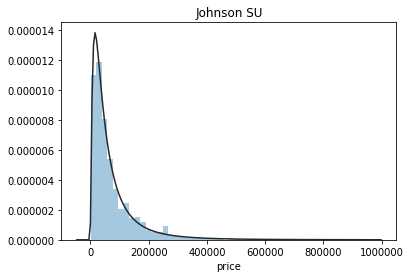

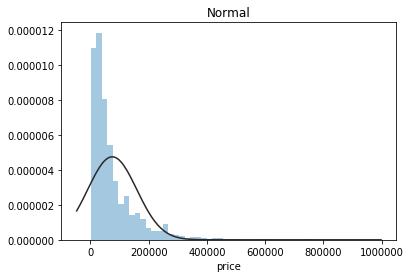

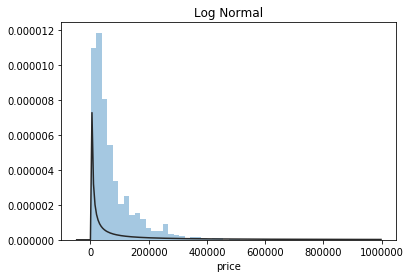

In [29]:
import scipy.stats as st
y = df['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

#### Price не следует нормальному распределению, поэтому перед выполнением регрессии его необходимо преобразовать. Хотя преобразование журналов работает довольно хорошо, лучше всего подходит неограниченный дистрибутив Джонсона.

In [32]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


#### Ни одна из количественных переменных не имеет нормального распределения, поэтому их также следует преобразовать.

C:\Users\natal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


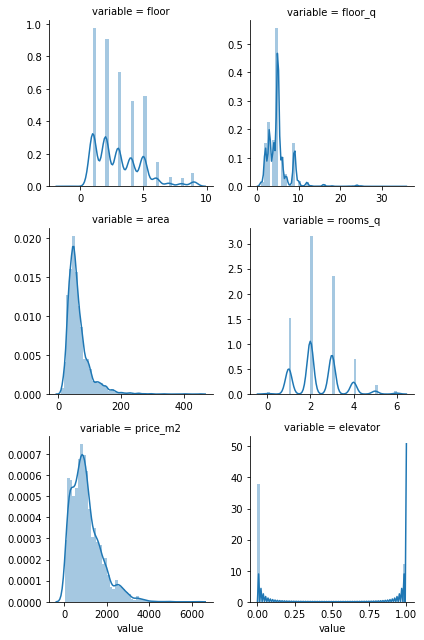

In [33]:
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [34]:
df.dtypes

city_municipality     object
city_parish           object
floor                  int64
floor_q                int64
area                 float64
comfortably           object
free_text             object
rooms_q                int64
price                float64
price_m2             float64
type                  object
serial                object
street_title          object
house_number          object
elevator               int64
dtype: object